In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('Ïñçüí¢')

Ïñçüí¢


In [13]:
data_dir = os.path.join(os.getenv('HOME'), 'work/kaggle_kakr_housing/data')
# hint : os.getenvÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë Í≤ΩÎ°úÎ•º ÏûëÏÑ±

train_data_path = os.path.join(data_dir, 'train.csv')
sub_data_path = os.path.join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

/home/jovyan/work/kaggle_kakr_housing/data/train.csv
/home/jovyan/work/kaggle_kakr_housing/data/test.csv


In [14]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(sub_data_path)

print('Ïñçüí¢')

Ïñçüí¢


In [15]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [16]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [17]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [18]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [19]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [20]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

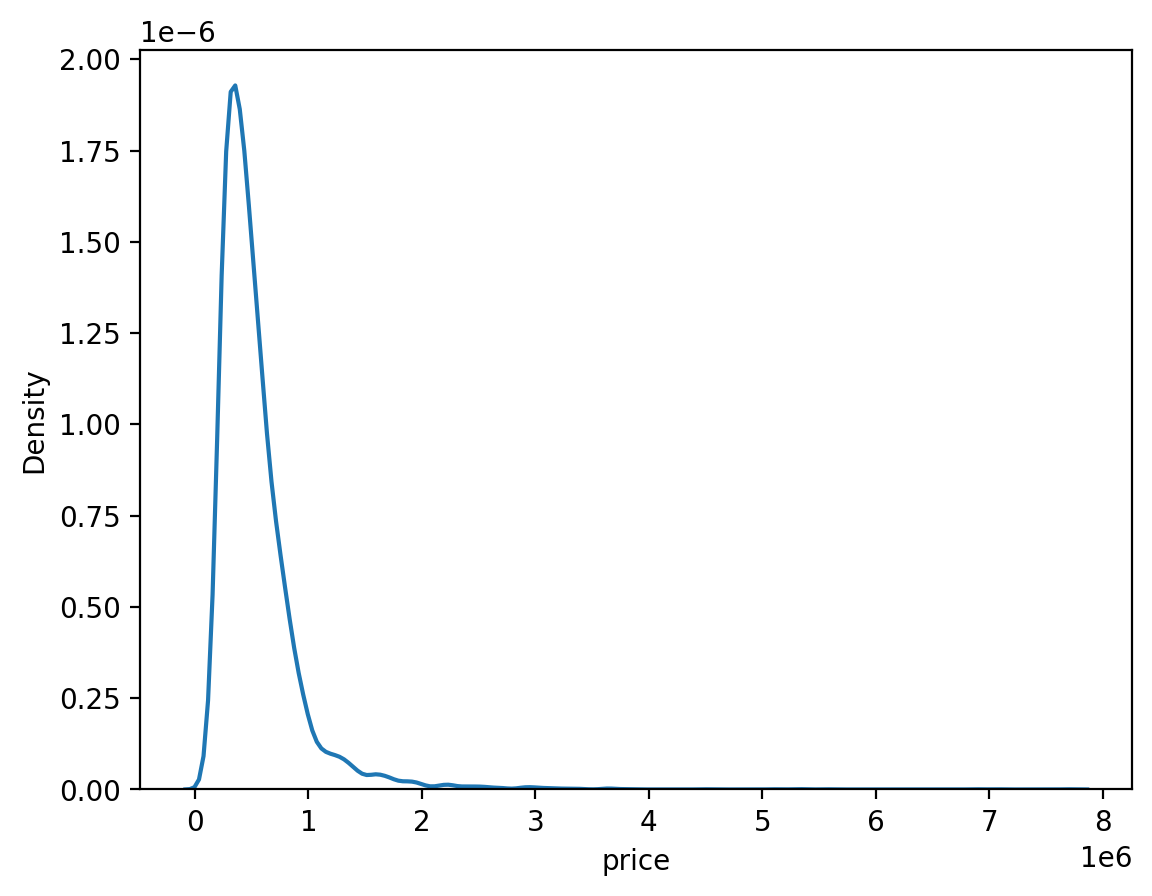

In [21]:
"""
seabornÏùò `kdeplot`ÏùÑ ÌôúÏö©Ìï¥ `y`Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!
"""

#ÏΩîÎìú ÏûëÏÑ±
sns.kdeplot(y)
plt.show()

In [22]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

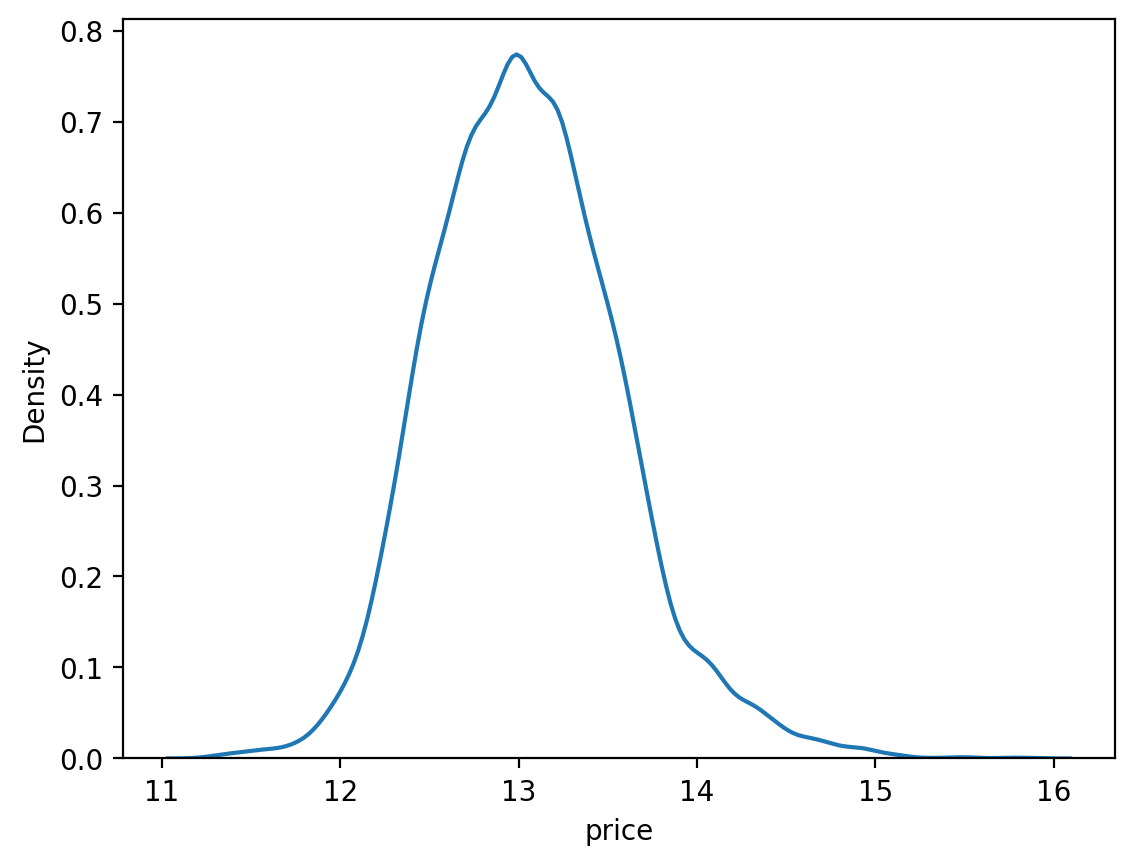

In [23]:
sns.kdeplot(y)
plt.show()

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('Ïñçüí¢')

Ïñçüí¢


In [26]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


In [27]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

Ïñçüí¢


In [28]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§.
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

Ïñçüí¢


In [29]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [30]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
    # random_stateÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥†Ï†ïÌïòÍ≥† trainÍ≥º test ÏÖãÏùò ÎπÑÏú®ÏùÄ 8:2Î°ú Ìï©ÎãàÎã§.
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)


    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)

    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)

    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.047779


{'GradientBoostingRegressor': np.float64(128360.19649691365),
 'XGBRegressor': np.float64(117618.22355411823),
 'LGBMRegressor': np.float64(111920.36735892233),
 'RandomForestRegressor': np.float64(125486.94461618949)}

In [32]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

In [33]:
from sklearn.model_selection import GridSearchCV

print('Ïñçüí¢')

Ïñçüí¢


In [34]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [35]:
model = LGBMRegressor(random_state=random_state)

print('Ïñçüí¢')

Ïñçüí¢


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import numpy as np

param_dist = {
    "learning_rate": [0.01, 0.03, 0.05],  # ÌïôÏäµÎ•†
    "n_estimators": [300, 600, 1000],     # Ìä∏Î¶¨ Í∞úÏàò
    "num_leaves": [31, 63, 127],          # Ìä∏Î¶¨ Î≥µÏû°ÎèÑ
    "subsample": [0.7, 0.85, 0.95]        # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ÎπÑÏú®
}

model = LGBMRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20, cv=3, scoring="neg_mean_squared_error",
    n_jobs=-1, verbose=1, random_state=42
)
search.fit(train, y)
print(search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [41]:
grid_model.cv_results_

{'mean_fit_time': array([12.29328354,  3.94600503,  3.52709715,  9.13343787,  6.13946549,
         8.51629289, 18.17765991, 19.29464873,  7.58372124,  1.57800039,
        13.11346491, 14.6491433 ,  6.00127125,  6.21506365,  2.3893563 ,
         5.8570714 ,  2.88508026,  5.25372918,  5.90604043,  2.49655382,
         6.77251871, 16.68114869,  6.51927145,  9.07072894,  4.20104067,
        10.81333383, 11.2511224 ,  4.57240748,  8.58532508,  2.60066048]),
 'std_fit_time': array([1.51562948, 0.35120188, 0.76299982, 3.24329483, 1.34376858,
        1.74077156, 4.96961337, 0.80170169, 0.43774857, 0.2052374 ,
        1.10801504, 2.74577625, 0.7396611 , 1.47689639, 0.44653928,
        0.5091329 , 0.39546961, 1.2626146 , 0.8379174 , 0.2714729 ,
        0.84985576, 1.80804646, 1.34441908, 1.83092047, 0.0698813 ,
        2.76915614, 4.11609296, 0.48334243, 1.46407289, 0.71734109]),
 'mean_score_time': array([0.67597802, 0.12303281, 0.08554872, 0.13818113, 0.10476136,
        0.21380035, 0.37416442

In [42]:
params = grid_model.cv_results_['params']
params

[{'subsample': 0.85,
  'reg_lambda': 3,
  'reg_alpha': 0,
  'num_leaves': 127,
  'n_estimators': 600,
  'max_depth': 8,
  'learning_rate': np.float64(0.025118864315095794),
  'colsample_bytree': 0.85},
 {'subsample': 0.95,
  'reg_lambda': 1,
  'reg_alpha': 3,
  'num_leaves': 63,
  'n_estimators': 400,
  'max_depth': 4,
  'learning_rate': np.float64(0.00630957344480193),
  'colsample_bytree': 0.7},
 {'subsample': 0.95,
  'reg_lambda': 3,
  'reg_alpha': 1,
  'num_leaves': 63,
  'n_estimators': 200,
  'max_depth': 6,
  'learning_rate': np.float64(0.00630957344480193),
  'colsample_bytree': 0.85},
 {'subsample': 0.85,
  'reg_lambda': 3,
  'reg_alpha': 0,
  'num_leaves': 31,
  'n_estimators': 400,
  'max_depth': 4,
  'learning_rate': np.float64(0.00630957344480193),
  'colsample_bytree': 0.85},
 {'subsample': 0.7,
  'reg_lambda': 1,
  'reg_alpha': 0,
  'num_leaves': 127,
  'n_estimators': 200,
  'max_depth': 6,
  'learning_rate': np.float64(0.05011872336272722),
  'colsample_bytree': 0.95},

In [43]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.02663006, -0.0468992 , -0.06704347, -0.04525692, -0.02786881,
       -0.02839462, -0.03520818, -0.0280445 , -0.04779604, -0.13114529,
       -0.0323192 , -0.02698747, -0.02739179, -0.02883616, -0.02701252,
       -0.03092692, -0.07929942, -0.03139553, -0.02759327, -0.02962042,
       -0.03819899, -0.0421247 , -0.03045649, -0.03353144, -0.05598181,
       -0.02605289, -0.02681691, -0.03813256, -0.02681192, -0.03130233])

In [44]:
# Ïó¨Í∏∞Ïóê ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.


results = pd.DataFrame(params)
results['score'] = score

results

subsample  reg_lambda  reg_alpha  num_leaves  n_estimators  max_depth  \
0        0.85           3          0         127           600          8   
1        0.95           1          3          63           400          4   
2        0.95           3          1          63           200          6   
3        0.85           3          0          31           400          4   
4        0.70           1          0         127           200          6   
5        0.85           3          3          31           400          6   
6        0.85           0          1         127           400          8   
7        0.85           0          0          63           600          6   
8        0.85           3          0         127           600          6   
9        0.85           3          3          63           200          4   
10       0.85           3          1         127           600          6   
11       0.95           3          3          63           600          8   
12       0.95           1          3          31           600          6   
13       0.95           1          1          31           600          4   
14       0.70           3          0         127           200          6   
15       0.95           0          1         127           600          4   
16       0.85           1          1          63           200          4   
17       0.95           3          3          63           400          6   
18       0.85           0          1         127           400          6   
19       0.70           1          0          31           200          6   
20       0.85           0          3          63           600          4   
21       0.95           0          0          63           600          8   
22       0.70           1          3          31           400          8   
23       0.95           1          3          63           600          6   
24       0.85           0          3          31           600          4   
25       0.85           0          1         127           600          6   
26       0.70           3          3         127           400          8   
27       0.70           3          3         127           200          8   
28       0.70           1          3         127           400          8   
29       0.95           3          3         127           400          4   

    learning_rate  colsample_bytree     score  
0        0.025119              0.85 -0.026630  
1        0.006310              0.70 -0.046899  
2        0.006310              0.85 -0.067043  
3        0.006310              0.85 -0.045257  
4        0.050119              0.95 -0.027869  
5        0.025119              0.95 -0.028395  
6        0.006310              0.85 -0.035208  
7        0.012589              0.85 -0.028045  
8        0.003162              0.70 -0.047796  
9        0.003162              0.85 -0.131145  
10       0.006310              0.85 -0.032319  
11       0.025119              0.95 -0.026987  
12       0.025119              0.95 -0.027392  
13       0.025119              0.95 -0.028836  
14       0.100000              0.85 -0.027013  
15       0.012589              0.70 -0.030927  
16       0.006310              0.70 -0.079299  
17       0.012589              0.95 -0.031396  
18       0.025119              0.85 -0.027593  
19       0.025119              0.70 -0.029620  
20       0.006310              0.85 -0.038199  
21       0.003162              0.85 -0.042125  
22       0.012589              0.85 -0.030456  
23       0.006310              0.70 -0.033531  
24       0.003162              0.85 -0.055982  
25       0.050119              0.70 -0.026053  
26       0.050119              0.95 -0.026817  
27       0.012589              0.85 -0.038133  
28       0.100000              0.95 -0.026812  
29       0.025119              0.95 -0.031302

In [45]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

subsample  reg_lambda  reg_alpha  num_leaves  n_estimators  max_depth  \
0        0.85           3          0         127           600          8   
1        0.95           1          3          63           400          4   
2        0.95           3          1          63           200          6   
3        0.85           3          0          31           400          4   
4        0.70           1          0         127           200          6   
5        0.85           3          3          31           400          6   
6        0.85           0          1         127           400          8   
7        0.85           0          0          63           600          6   
8        0.85           3          0         127           600          6   
9        0.85           3          3          63           200          4   
10       0.85           3          1         127           600          6   
11       0.95           3          3          63           600          8   
12       0.95           1          3          31           600          6   
13       0.95           1          1          31           600          4   
14       0.70           3          0         127           200          6   
15       0.95           0          1         127           600          4   
16       0.85           1          1          63           200          4   
17       0.95           3          3          63           400          6   
18       0.85           0          1         127           400          6   
19       0.70           1          0          31           200          6   
20       0.85           0          3          63           600          4   
21       0.95           0          0          63           600          8   
22       0.70           1          3          31           400          8   
23       0.95           1          3          63           600          6   
24       0.85           0          3          31           600          4   
25       0.85           0          1         127           600          6   
26       0.70           3          3         127           400          8   
27       0.70           3          3         127           200          8   
28       0.70           1          3         127           400          8   
29       0.95           3          3         127           400          4   

    learning_rate  colsample_bytree     score      RMSE  
0        0.025119              0.85 -0.026630  0.163187  
1        0.006310              0.70 -0.046899  0.216562  
2        0.006310              0.85 -0.067043  0.258928  
3        0.006310              0.85 -0.045257  0.212737  
4        0.050119              0.95 -0.027869  0.166940  
5        0.025119              0.95 -0.028395  0.168507  
6        0.006310              0.85 -0.035208  0.187638  
7        0.012589              0.85 -0.028045  0.167465  
8        0.003162              0.70 -0.047796  0.218623  
9        0.003162              0.85 -0.131145  0.362140  
10       0.006310              0.85 -0.032319  0.179775  
11       0.025119              0.95 -0.026987  0.164279  
12       0.025119              0.95 -0.027392  0.165505  
13       0.025119              0.95 -0.028836  0.169812  
14       0.100000              0.85 -0.027013  0.164355  
15       0.012589              0.70 -0.030927  0.175861  
16       0.006310              0.70 -0.079299  0.281602  
17       0.012589              0.95 -0.031396  0.177188  
18       0.025119              0.85 -0.027593  0.166112  
19       0.025119              0.70 -0.029620  0.172106  
20       0.006310              0.85 -0.038199  0.195446  
21       0.003162              0.85 -0.042125  0.205243  
22       0.012589              0.85 -0.030456  0.174518  
23       0.006310              0.70 -0.033531  0.183116  
24       0.003162              0.85 -0.055982  0.236605  
25       0.050119              0.70 -0.026053  0.161409  
26       0.050119              0.95 -0.026817  0.1

In [46]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

subsample  reg_lambda  reg_alpha  num_leaves  n_estimators  max_depth  \
0        0.85           3          0         127           600          8   
1        0.95           1          3          63           400          4   
2        0.95           3          1          63           200          6   
3        0.85           3          0          31           400          4   
4        0.70           1          0         127           200          6   
5        0.85           3          3          31           400          6   
6        0.85           0          1         127           400          8   
7        0.85           0          0          63           600          6   
8        0.85           3          0         127           600          6   
9        0.85           3          3          63           200          4   
10       0.85           3          1         127           600          6   
11       0.95           3          3          63           600          8   
12       0.95           1          3          31           600          6   
13       0.95           1          1          31           600          4   
14       0.70           3          0         127           200          6   
15       0.95           0          1         127           600          4   
16       0.85           1          1          63           200          4   
17       0.95           3          3          63           400          6   
18       0.85           0          1         127           400          6   
19       0.70           1          0          31           200          6   
20       0.85           0          3          63           600          4   
21       0.95           0          0          63           600          8   
22       0.70           1          3          31           400          8   
23       0.95           1          3          63           600          6   
24       0.85           0          3          31           600          4   
25       0.85           0          1         127           600          6   
26       0.70           3          3         127           400          8   
27       0.70           3          3         127           200          8   
28       0.70           1          3         127           400          8   
29       0.95           3          3         127           400          4   

    learning_rate  colsample_bytree     score     RMSLE  
0        0.025119              0.85 -0.026630  0.163187  
1        0.006310              0.70 -0.046899  0.216562  
2        0.006310              0.85 -0.067043  0.258928  
3        0.006310              0.85 -0.045257  0.212737  
4        0.050119              0.95 -0.027869  0.166940  
5        0.025119              0.95 -0.028395  0.168507  
6        0.006310              0.85 -0.035208  0.187638  
7        0.012589              0.85 -0.028045  0.167465  
8        0.003162              0.70 -0.047796  0.218623  
9        0.003162              0.85 -0.131145  0.362140  
10       0.006310              0.85 -0.032319  0.179775  
11       0.025119              0.95 -0.026987  0.164279  
12       0.025119              0.95 -0.027392  0.165505  
13       0.025119              0.95 -0.028836  0.169812  
14       0.100000              0.85 -0.027013  0.164355  
15       0.012589              0.70 -0.030927  0.175861  
16       0.006310              0.70 -0.079299  0.281602  
17       0.012589              0.95 -0.031396  0.177188  
18       0.025119              0.85 -0.027593  0.166112  
19       0.025119              0.70 -0.029620  0.172106  
20       0.006310              0.85 -0.038199  0.195446  
21       0.003162              0.85 -0.042125  0.205243  
22       0.012589              0.85 -0.030456  0.174518  
23       0.006310              0.70 -0.033531  0.183116  
24       0.003162              0.85 -0.055982  0.236605  
25       0.050119              0.70 -0.026053  0.161409  
26       0.050119              0.95 -0.026817  0.1

In [51]:
# ÏúÑÏùò ÌëúÎ•º `RMSLE`Í∞Ä ÎÇÆÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Ìï¥Ï£ºÏÑ∏Ïöî.

results = results.sort_values('RMSLE')
results

subsample  reg_lambda  reg_alpha  num_leaves  n_estimators  max_depth  \
25       0.85           0          1         127           600          6   
0        0.85           3          0         127           600          8   
28       0.70           1          3         127           400          8   
26       0.70           3          3         127           400          8   
11       0.95           3          3          63           600          8   
14       0.70           3          0         127           200          6   
12       0.95           1          3          31           600          6   
18       0.85           0          1         127           400          6   
4        0.70           1          0         127           200          6   
7        0.85           0          0          63           600          6   
5        0.85           3          3          31           400          6   
13       0.95           1          1          31           600          4   
19       0.70           1          0          31           200          6   
22       0.70           1          3          31           400          8   
15       0.95           0          1         127           600          4   
29       0.95           3          3         127           400          4   
17       0.95           3          3          63           400          6   
10       0.85           3          1         127           600          6   
23       0.95           1          3          63           600          6   
6        0.85           0          1         127           400          8   
27       0.70           3          3         127           200          8   
20       0.85           0          3          63           600          4   
21       0.95           0          0          63           600          8   
3        0.85           3          0          31           400          4   
1        0.95           1          3          63           400          4   
8        0.85           3          0         127           600          6   
24       0.85           0          3          31           600          4   
2        0.95           3          1          63           200          6   
16       0.85           1          1          63           200          4   
9        0.85           3          3          63           200          4   

    learning_rate  colsample_bytree     score     RMSLE  
25       0.050119              0.70 -0.026053  0.161409  
0        0.025119              0.85 -0.026630  0.163187  
28       0.100000              0.95 -0.026812  0.163743  
26       0.050119              0.95 -0.026817  0.163759  
11       0.025119              0.95 -0.026987  0.164279  
14       0.100000              0.85 -0.027013  0.164355  
12       0.025119              0.95 -0.027392  0.165505  
18       0.025119              0.85 -0.027593  0.166112  
4        0.050119              0.95 -0.027869  0.166940  
7        0.012589              0.85 -0.028045  0.167465  
5        0.025119              0.95 -0.028395  0.168507  
13       0.025119              0.95 -0.028836  0.169812  
19       0.025119              0.70 -0.029620  0.172106  
22       0.012589              0.85 -0.030456  0.174518  
15       0.012589              0.70 -0.030927  0.175861  
29       0.025119              0.95 -0.031302  0.176925  
17       0.012589              0.95 -0.031396  0.177188  
10       0.006310              0.85 -0.032319  0.179775  
23       0.006310              0.70 -0.033531  0.183116  
6        0.006310              0.85 -0.035208  0.187638  
27       0.012589              0.85 -0.038133  0.195276  
20       0.006310              0.85 -0.038199  0.195446  
21       0.003162              0.85 -0.042125  0.205243  
3        0.006310              0.85 -0.045257  0.212737  
1        0.006310              0.70 -0.046899  0.216562  
8        0.003162              0.70 -0.047796  0.218623  
24       0.003162              0.85 -0.055982  0.2

In [52]:
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§.
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [53]:
results

subsample  reg_lambda  reg_alpha  num_leaves  n_estimators  max_depth  \
25       0.85           0          1         127           600          6   
0        0.85           3          0         127           600          8   
28       0.70           1          3         127           400          8   
26       0.70           3          3         127           400          8   
11       0.95           3          3          63           600          8   
14       0.70           3          0         127           200          6   
12       0.95           1          3          31           600          6   
18       0.85           0          1         127           400          6   
4        0.70           1          0         127           200          6   
7        0.85           0          0          63           600          6   
5        0.85           3          3          31           400          6   
13       0.95           1          1          31           600          4   
19       0.70           1          0          31           200          6   
22       0.70           1          3          31           400          8   
15       0.95           0          1         127           600          4   
29       0.95           3          3         127           400          4   
17       0.95           3          3          63           400          6   
10       0.85           3          1         127           600          6   
23       0.95           1          3          63           600          6   
6        0.85           0          1         127           400          8   
27       0.70           3          3         127           200          8   
20       0.85           0          3          63           600          4   
21       0.95           0          0          63           600          8   
3        0.85           3          0          31           400          4   
1        0.95           1          3          63           400          4   
8        0.85           3          0         127           600          6   
24       0.85           0          3          31           600          4   
2        0.95           3          1          63           200          6   
16       0.85           1          1          63           200          4   
9        0.85           3          3          63           200          4   

    learning_rate  colsample_bytree     score     RMSLE  
25       0.050119              0.70 -0.026053  0.161409  
0        0.025119              0.85 -0.026630  0.163187  
28       0.100000              0.95 -0.026812  0.163743  
26       0.050119              0.95 -0.026817  0.163759  
11       0.025119              0.95 -0.026987  0.164279  
14       0.100000              0.85 -0.027013  0.164355  
12       0.025119              0.95 -0.027392  0.165505  
18       0.025119              0.85 -0.027593  0.166112  
4        0.050119              0.95 -0.027869  0.166940  
7        0.012589              0.85 -0.028045  0.167465  
5        0.025119              0.95 -0.028395  0.168507  
13       0.025119              0.95 -0.028836  0.169812  
19       0.025119              0.70 -0.029620  0.172106  
22       0.012589              0.85 -0.030456  0.174518  
15       0.012589              0.70 -0.030927  0.175861  
29       0.025119              0.95 -0.031302  0.176925  
17       0.012589              0.95 -0.031396  0.177188  
10       0.006310              0.85 -0.032319  0.179775  
23       0.006310              0.70 -0.033531  0.183116  
6        0.006310              0.85 -0.035208  0.187638  
27       0.012589              0.85 -0.038133  0.195276  
20       0.006310              0.85 -0.038199  0.195446  
21       0.003162              0.85 -0.042125  0.205243  
3        0.006310              0.85 -0.045257  0.212737  
1        0.006310              0.70 -0.046899  0.216562  
8        0.003162              0.70 -0.047796  0.218623  
24       0.003162              0.85 -0.055982  0.2

In [54]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = '~/work/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [56]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.161409')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
~/work/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.161409.csv saved!
